In [2]:
from GoogleNgrams import Ngrams
import pandas as pd, matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [10]:
a1 = Ngrams('Liberté, Egalité',start=1800, end=1870, language = 'fre_2019')

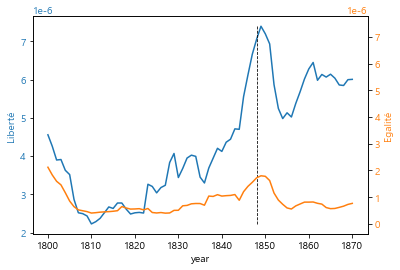

In [11]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('year')
ax1.set_ylabel('Liberté', color = 'C0')
ax1.plot(a1.Liberté, color = 'C0')
ax1.tick_params(axis='y', labelcolor = 'C0')

ax2 = ax1.twinx()
ax2.set_ylabel('Egalité', color = 'C1')
ax2.plot(a1.Egalité, color = 'C1')
ax2.tick_params(axis='y', labelcolor = 'C1')

plt.vlines(x=1848, ymin=0, ymax=np.array(a1).max(),
          linewidth=0.8, color='black', linestyle='dashed')

In [4]:
bre = ['breeches', 'culotte']
pan = ['pantaloons', 'pantalon']

In [66]:
b = Ngrams(', '.join(pd.Series(bre).str.cat(['eng_2019','fre_2019'],sep=':')),
           start=1800, end= 1870)
b1 = Ngrams(', '.join(pd.Series(pan).str.cat(['eng_2019','fre_2019'],sep=':')),
           start=1800, end= 1870)

b.columns = pd.MultiIndex.from_product([['브리치즈'], b],
                                      names=['Type','past'])
b1.columns = pd.MultiIndex.from_product([['판탈룬'], b1],
                                      names=['Type','past'])

b2 = pd.concat([b,b1],axis=1)

In [20]:
b2.head()

Type              브리치즈                                  판탈룬                  
past breeches:eng_2019 culotte:fre_2019 pantaloons:eng_2019 pantalon:fre_2019
1800          0.000004         0.000002        7.177182e-07      8.609885e-07
1801          0.000004         0.000002        6.898882e-07      9.984677e-07
1802          0.000004         0.000002        6.635411e-07      9.471290e-07
1803          0.000004         0.000002        6.445655e-07      9.367068e-07
1804          0.000004         0.000002        6.258079e-07      8.575528e-07

([<matplotlib.axis.XTick at 0x1d9ff71f550>,
 [Text(1800, 0, '1800'),
  Text(1815, 0, '왕정복고'),
  Text(1830, 0, '7월 혁명'),
  Text(1848, 0, '1848년 혁명'),
  Text(1870, 0, '제 3공화국 성립')])

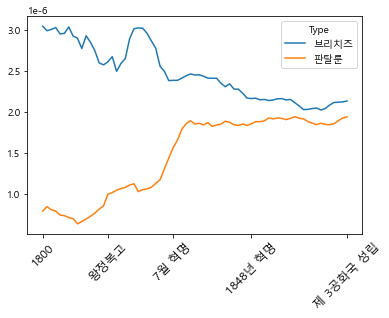

In [68]:
b2.groupby(level = 'Type', axis=1).mean().plot()
plt.xticks([1800,1815,1830,1848,1870],
          [1800,'왕정복고','7월 혁명','1848년 혁명','제 3공화국 성립'],
           rotation = 45,fontsize = 'large')

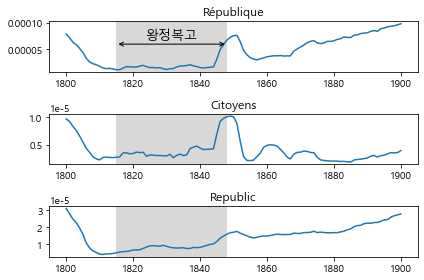

In [3]:
rep = Ngrams('République',start=1800, end=1900, language='fre_2019')
rep1 = Ngrams('Citoyens',start=1800, end=1900, language='fre_2019')
rep2 = Ngrams('Republic',start=1800, end=1900)

plt.subplot(3,1,1)
plt.plot(rep)
plt.title('République')
plt.axvspan(1815,1848, facecolor='grey', alpha = 0.3)
plt.annotate('',xy=(1815, 0.00006), xytext=(1848,0.00006),
             horizontalalignment = "center", 
              arrowprops={'arrowstyle':'<->'})
plt.annotate('왕정복고', ((1815+1848)/2, 0.00007),
              horizontalalignment="center", size = 13)

plt.subplot(3,1,2)
plt.plot(rep1)
plt.axvspan(1815,1848, facecolor='grey', alpha = 0.3)
plt.title('Citoyens')

plt.subplot(3,1,3)
plt.plot(rep2)
plt.axvspan(1815,1848, facecolor='grey', alpha = 0.3)
plt.title('Republic')

plt.tight_layout()

<AxesSubplot:>

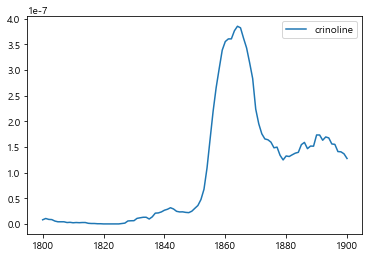

In [35]:
wo = Ngrams('crinoline', start=1800, end=1900, language = 'fre_2019')
wo.plot()
#1870년 제 3공화국 선포

<AxesSubplot:>

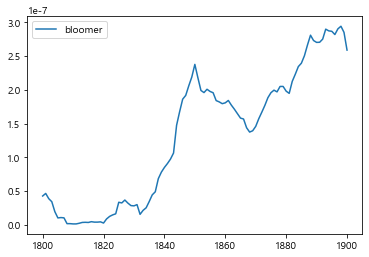

In [6]:
g = Ngrams('bloomer',start=1800, end=1900)
#19세기말 블루머주의(Bloomerism): 남녀평등 사회운동
# -> 체조, 승마, 사이클링 즐기는 여성 증가
g.plot()

<AxesSubplot:>

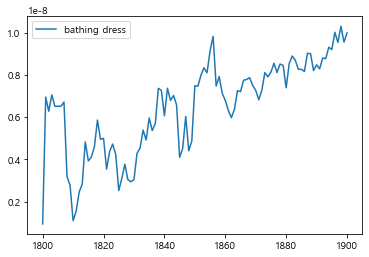

In [7]:
g1 = Ngrams('bathing dress',start=1800, end=1900)
g1.plot()

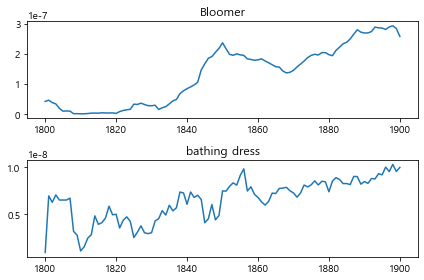

In [8]:
plt.subplot(2,1,1)
plt.plot(g)
plt.title('Bloomer')

plt.subplot(2,1,2)
plt.plot(g1)
plt.title('bathing dress')

plt.tight_layout()